In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

In [3]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.', 
                 infer_datetime_format=True, squeeze=True).dropna()

In [16]:
vix.tail()

DATE
2021-03-12    20.69
2021-03-15    20.03
2021-03-16    19.79
2021-03-17    19.23
2021-03-18    21.58
Name: VIXCLS, dtype: float64

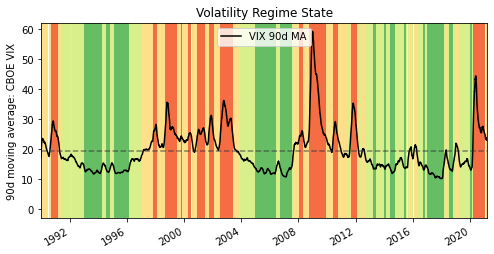

In [14]:
ma = vix.rolling('90d').mean()

state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4))

cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4), label='VIX 90d MA')

ax = plt.gca() #получаем текущий объект Axes, на который ссылается ma.plot()
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state == i, facecolor=color, transform=trans)
    
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey', alpha=0.6, label='Full-period mean', marker='')
plt.show()